In [1]:
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch.backends.cudnn as cudnn
import torchvision.utils as vutils
cudnn.benchmark = True

# some utility function for visualization
import utils
from utils.util_3d import init_mesh_renderer, sdf_to_mesh

# some utility function
from utils.qual_util import save_mesh_as_gif
from IPython.display import Image as ipy_image
from IPython.display import display

%reload_ext autoreload
%autoreload 2

In [2]:
from utils.demo_util import get_shape_comp_opt, get_shape_comp_model
from utils.qual_util import load_resnet2vq_model

""" setup opt"""
gpu_id = 0

opt = get_shape_comp_opt(gpu_id=gpu_id)

""" setup models """
model = get_shape_comp_model(opt)    
model.eval()

# img marginal model
resnet2vq = load_resnet2vq_model(opt)

""" setup renderer """
dist, elev, azim = 1.7, 20, 20
mesh_renderer = init_mesh_renderer(image_size=256, dist=dist, elev=elev, azim=azim, device=opt.device)

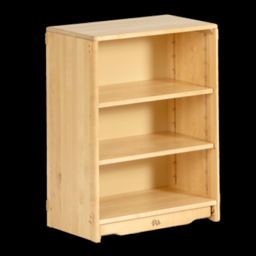

In [3]:
""" setup pix3d img dataset and image marginal model """
from utils.qual_util import load_resnet2vq_model, preprocess_img

# load and preprocess image
# img_path = 'demo_data/chair_2598.jpg'
# img_path = 'demo_data/chair.jpg'
img_path = 'demo_data/shelf2.jpg'
# img_mask_path = 'demo_data/chair_2598_mask.png'
img_mask_path = 'demo_data/chair_mask.png'

img_input = preprocess_img(img_path, img_mask_path)

img_name = 'demo_data/tmp.png'
vutils.save_image(img_input/2+.5, img_name)
display(ipy_image(img_name))

[*] autoregressively inferencing...: 100%|██████████| 512/512 [00:06<00:00, 80.73it/s] 


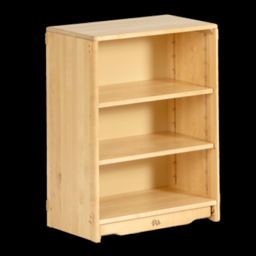

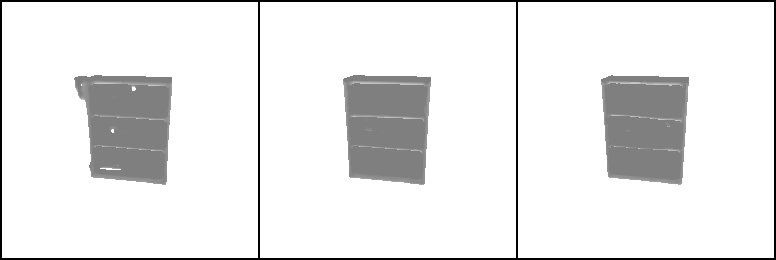

In [4]:
""" single-view reconstruction """ 
nimgs = 3
topk = 30
alpha = 0.5
alpha = 0.75

single_view_recon = model.single_view_recon(img_input, resnet2vq, bs=nimgs, topk=topk, alpha=alpha)

gen_mesh = sdf_to_mesh(single_view_recon)

# save as gif
res_dir = 'results'
gen_gif_name = f'{res_dir}/single-view-gen.gif'
save_mesh_as_gif(mesh_renderer, gen_mesh, nrow=3, out_name=gen_gif_name)

for name in [img_name, gen_gif_name]:
    display(ipy_image(name))